In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA

###**Choose Variables + Clean Data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/ICS5110 Project/Final Code & Report/cleaned_data_using_content_v2.csv"
data_df = pd.read_csv(data_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
data_df.columns

Index(['source', 'published_date', 'title', 'content', 'hospital flag',
       'date of incident', 'weekday of incident', 'time of incident',
       'weekday_mentioned', 'time_ampm', 'city_id', 'city', 'found_in',
       'longitude', 'latitude', 'population', 'date_str',
       'weather_weather_code', 'weather_temperature_2m_max',
       'weather_temperature_2m_min', 'weather_temperature_2m_mean',
       'weather_precipitation_sum', 'weather_precipitation_hours',
       'weather_rain_sum', 'weather_wind_speed_10m_max', 'weather_category',
       'weather_type_category_code', 'accident_flag', 'hospital_flag',
       'fatal_flag', 'injury_flag', 'severe_flag', 'minor_flag',
       'motorcycle_flag', 'bike_flag', 'car_flag', 'gender_M_flag',
       'gender_F_flag', 'heavy_vehicle_flag', 'pedestrian_flag',
       'illegal_flag', 'traffic_flag', 'control_flag', 'vehicle_count'],
      dtype='object')

In [ ]:
# Add one column for each weekday
data_df = pd.concat([data_df, pd.get_dummies(data_df["weekday of incident"], dtype=int)], axis=1)

# Drope Variables that are not needed, can not be used or create unnecessary noise
data_df = data_df.drop(columns=["source", "published_date", "title", "content", "weekday_mentioned", "time_ampm", "found_in", "longitude", "latitude", "date_str", "weather_weather_code", "weather_temperature_2m_max", "weather_temperature_2m_min", "weather_precipitation_hours", "weather_rain_sum", "weather_category", "city", "weather_type_category_code", "hospital flag", "date of incident", "accident_flag", "hospital_flag", "injury_flag", "severe_flag", "minor_flag", "city_id", "weekday of incident"])

data_df.head(10)

,time of incident,population,weather_temperature_2m_mean,weather_precipitation_sum,weather_wind_speed_10m_max,fatal_flag,motorcycle_flag,bike_flag,car_flag,gender_M_flag,gender_F_flag,heavy_vehicle_flag,pedestrian_flag,illegal_flag,traffic_flag,control_flag,vehicle_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,930.0,10823.0,20.405668,0.0,9.822790,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0
1,1830.0,2997.0,25.332254,0.0,9.418661,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,1,0,0
2,800.0,93897.0,20.070833,0.0,20.118975,0,1,0,1,1,0,0,0,0,1,0,2,0,1,0,0,0,0,0
3,1800.0,4722.0,25.393417,0.0,31.644184,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,0,1,0
4,2045.0,11497.0,14.405502,0.4,18.571430,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0
5,850.0,4401.0,19.889584,0.5,36.214012,0,1,0,1,1,0,1,0,0,1,0,3,0,0,0,0,0,1,0
6,1030.0,3070.0,28.827085,0.0,19.896310,1,1,0,1,1,1,1,0,0,1,0,3,0,0,0,0,0,0,1
7,815.0,11508.0,26.589584,0.0,17.589418,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0
8,1545.0,14890.0,26.389582,0.0,8.891344,0,1,0,1,1,0,0,0,0,1,0,2,0,0,1,0,0,0,0
9,915.0,15404.0,14.308333,0.2,13.183080,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Replace missing time with median
median_time = data_df["time of incident"].median()
data_df["time of incident"] = data_df["time of incident"].fillna(median_time)

# Replace missing population with median
median_population = data_df["population"].median()
data_df["population"] = data_df["population"].fillna(median_population)

# Replace missing temperature with median
median_temp = data_df["weather_temperature_2m_mean"].median()
data_df["weather_temperature_2m_mean"] = data_df["weather_temperature_2m_mean"].fillna(median_temp)

# Replace missing precipitation sum with median
median_precip = data_df["weather_precipitation_sum"].median()
data_df["weather_precipitation_sum"] = data_df["weather_precipitation_sum"].fillna(median_precip)

# Replace missing wind max speed with median
median_wind = data_df["weather_wind_speed_10m_max"].median()
data_df["weather_wind_speed_10m_max"] = data_df["weather_wind_speed_10m_max"].fillna(median_wind)

#Check if any missing values left
print("Missing values: ", data_df.isna().sum())

data_df.head(10)

Missing values:  time of incident               0
population                     0
weather_temperature_2m_mean    0
weather_precipitation_sum      0
weather_wind_speed_10m_max     0
fatal_flag                     0
motorcycle_flag                0
bike_flag                      0
car_flag                       0
gender_M_flag                  0
gender_F_flag                  0
heavy_vehicle_flag             0
pedestrian_flag                0
illegal_flag                   0
traffic_flag                   0
control_flag                   0
vehicle_count                  0
Friday                         0
Monday                         0
Saturday                       0
Sunday                         0
Thursday                       0
Tuesday                        0
Wednesday                      0
dtype: int64


,time of incident,population,weather_temperature_2m_mean,weather_precipitation_sum,weather_wind_speed_10m_max,fatal_flag,motorcycle_flag,bike_flag,car_flag,gender_M_flag,gender_F_flag,heavy_vehicle_flag,pedestrian_flag,illegal_flag,traffic_flag,control_flag,vehicle_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,930.0,10823.0,20.405668,0.0,9.822790,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0
1,1830.0,2997.0,25.332254,0.0,9.418661,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,1,0,0
2,800.0,93897.0,20.070833,0.0,20.118975,0,1,0,1,1,0,0,0,0,1,0,2,0,1,0,0,0,0,0
3,1800.0,4722.0,25.393417,0.0,31.644184,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,0,0,1,0
4,2045.0,11497.0,14.405502,0.4,18.571430,0,1,0,1,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0
5,850.0,4401.0,19.889584,0.5,36.214012,0,1,0,1,1,0,1,0,0,1,0,3,0,0,0,0,0,1,0
6,1030.0,3070.0,28.827085,0.0,19.896310,1,1,0,1,1,1,1,0,0,1,0,3,0,0,0,0,0,0,1
7,815.0,11508.0,26.589584,0.0,17.589418,0,1,0,1,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0
8,1545.0,14890.0,26.389582,0.0,8.891344,0,1,0,1,1,0,0,0,0,1,0,2,0,0,1,0,0,0,0
9,915.0,15404.0,14.308333,0.2,13.183080,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### **Logistic Regression Model + Hyperparameter Tuning**

In [ ]:
# Define variables
y = data_df["fatal_flag"]
x = data_df.drop(columns=["fatal_flag"])

# Train/test model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=10,
)

# Mistakes on fatal accidents matter more than mistakes on non-fatal ones, therefore class weighting was applied
model = LogisticRegression(max_iter=1000, class_weight="balanced")

# Scaling variables for better comparison
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Sanity check
print("x train shape:", x_train_scaled.shape)
print("x test shape:", x_test_scaled.shape)

# Check if any catgeorical variables left
x.select_dtypes(include="object").columns

x train shape: (302, 23)
x test shape: (130, 23)


Index([], dtype='object')

In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

# Tests each C using 5 fold cross validation
grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="f1"
)

# Train the model and find best C value
grid.fit(x_train_scaled, y_train)

best_model = grid.best_estimator_

# Check the F1 scores for each C value
print(grid.cv_results_["params"])
print(grid.cv_results_["mean_test_score"])

[{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]
[0.65139407 0.64541352 0.64191083 0.65867625 0.65867625]


### **Evaluation + Results**

Confusion matrix:
[[50 24]
 [19 37]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        74
           1       0.61      0.66      0.63        56

    accuracy                           0.67       130
   macro avg       0.67      0.67      0.67       130
weighted avg       0.67      0.67      0.67       130



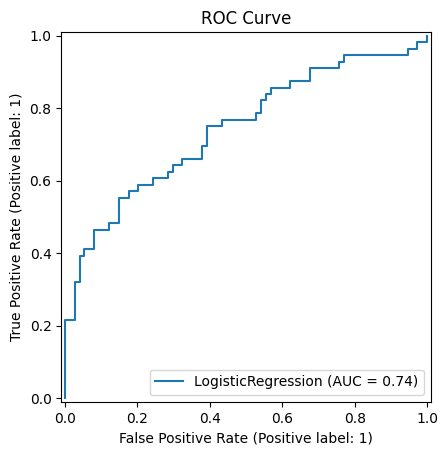

In [ ]:
# Evaluate model, confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_model.predict(x_test_scaled)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

# ROC curve
RocCurveDisplay.from_estimator(best_model, x_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

Top 10 features that increase fatality:


,Feature,coefficient
14,control_flag,0.906573
12,illegal_flag,0.291228
6,bike_flag,0.230278
1,population,0.176368
2,weather_temperature_2m_mean,0.124587
15,vehicle_count,0.097900
18,Saturday,0.092866
5,motorcycle_flag,0.090778
20,Thursday,0.087968
10,heavy_vehicle_flag,0.076448


Top 10 features that decrease fatality:


,Feature,coefficient
3,weather_precipitation_sum,-0.269418
8,gender_M_flag,-0.237975
19,Sunday,-0.097873
7,car_flag,-0.087538
13,traffic_flag,-0.087081
21,Tuesday,-0.055951
22,Wednesday,-0.045655
16,Friday,-0.038682
9,gender_F_flag,-0.017514
0,time of incident,-0.006303


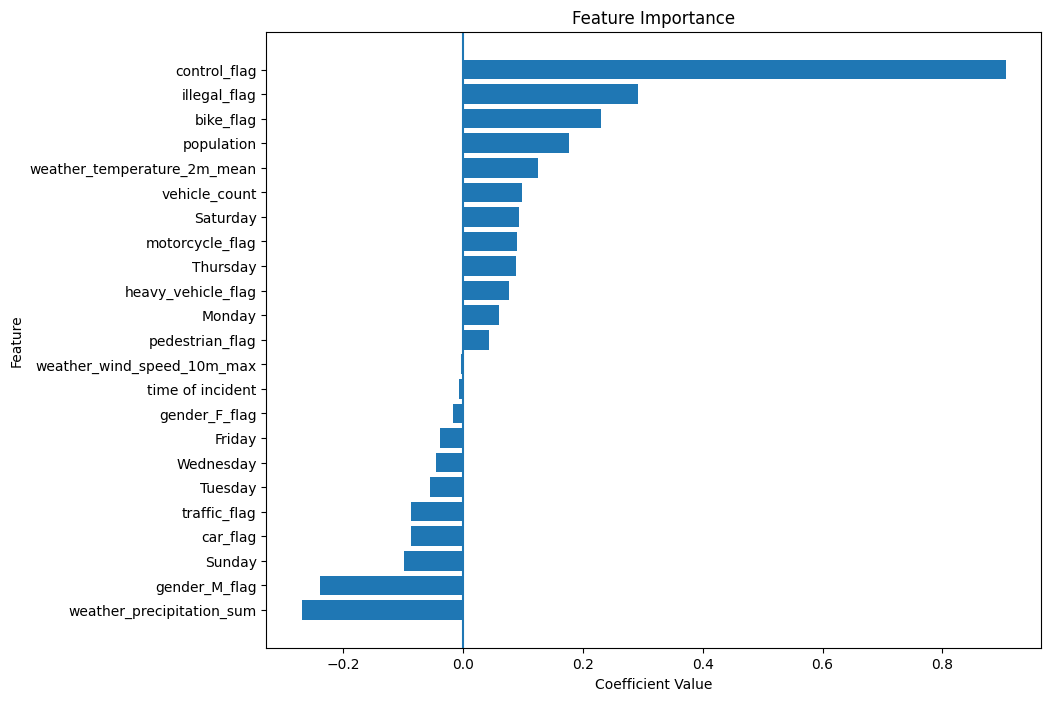

In [ ]:
# Feature importance

# Create table for each feature and coefficient
coef_df = pd.DataFrame({
    "Feature": x_train.columns,
    "coefficient": best_model.coef_[0]
})

# Show top 10 features that increase fatality
print("Top 10 features that increase fatality:")
display(coef_df.sort_values("coefficient", ascending=False).head(10))

# Show top 10 features that decrease fatality
print("Top 10 features that decrease fatality:")
display(coef_df.sort_values("coefficient", ascending=True).head(10))


# Sort from lowest to highest
coef_df = coef_df.sort_values("coefficient")

# Plot features and effects
plt.figure(figsize=(10, 8))
plt.barh(coef_df["Feature"], coef_df["coefficient"])
plt.axvline(0)
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()